# Data Analysis Project (Bike Sharing)

Syed Johan Arif - 17219380
Farah Husna - 17217922
Noor Ainahusna - 17218677
Ikmal Syafiq - 17221651

## Initial Questions
1. Is bike sharing a sustainable solution?
2. How does the weather affect bike sharing demands?
3. Which is most popular season for bike sharing? 
4. What are the factors that affecting bike rentals demand?


## Overview and Motivation
Consider that this will be read by people who did not see your project proposal. 
### Overview
Bike Sharing is an interesting approach to urban mobility by combining the flexibility and convience of a bicycle with the accessability of public transportation. <br />
This is a fairly recent trend that seems to be gaining popularity due to its' green concept approach by allowing users to pick up, ride and drop off bicycles at numerous locations within a city. <br />
The many benefits of the bike-sharing system include:
    1. Health benefits for the riders
    2. Reduces traffic congestion in urban areas
    2. Environmental benefits such as reduced carbon emmisions and sustainability
    3. Economic benefits include a positive effect on business activity due to increased accessibility within local neighborhoods.

This project examines a dataset on the hourly rentals of a bike-sharing system within the span of 2 years.
### Motivation
The motivation of this project is to examine and predict the trend of bike sharing usage. In addition, we would also like to
see what factors that influence the usage of bike sharing. Moreover, we would also like to predict the number of bike sharing usage
based on factors such as windspeed, temperature, humidity,months, working day or holidays so that bike sharing company can 
provide the number of bicycle to be used appropriately.


## Related Work
[Dataset Source](https://www.kaggle.com/c/bike-sharing-demand/data) <br />
[Penang Bike Sharing Initiative Article](https://www.malaysiakini.com/news/383778) <br />
[Penang LinkBike WebSite](https://www.linkbike.my/) <br />

## Data Cleaning

Import data and view first five column of the data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv", index_col=False)
data2 = data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


First thing is to check if the dataset has any null values.
Then boxplots for the variables temp, atemp, humidity, windspeed and count are created
to see their distribution

[]
Test_clean is empty, no null values present in dataset


Text(0.5, 1.0, 'count')

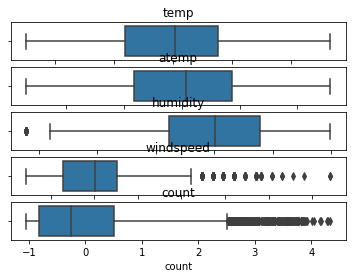

In [72]:
# Creating boxplots to look at the distribution of variables for
# temp, atemp, humidity, windspeed, count

from scipy import stats
import seaborn as sns
test_clean = data
print(test_clean.columns[test_clean.isnull().any()].tolist())
print("Test_clean is empty, no null values present in dataset")

fig, axs = plt.subplots(5,1)
sns.boxplot(x=check_zscore['temp'], ax=axs[0]).set_title("temp")
sns.boxplot(x=check_zscore['atemp'], ax=axs[1]).set_title("atemp")
sns.boxplot(x=check_zscore['humidity'], ax=axs[2]).set_title("humidity")
sns.boxplot(x=check_zscore['windspeed'], ax=axs[3]).set_title("windspeed")
sns.boxplot(x=check_zscore['count'], ax=axs[4]).set_title("count")

#### BoxPlot Analysis
1. Temp, atemp and humidity seem have a normal distribution
2. Windspeed is negatively skewed. Which indicate that most of the time the windspeeds are low
3. Count is positively skewed. This means that there are higher frequencies of high values, which could mean that demand for bike sharing is good

#### Converting datetime to pandas datetime object
Converting the datetime values to pandas datetime object to enable pandas processing on datetime column

In [6]:
#Convert date to Pandas Datetime object
data['datetime'] = pd.to_datetime(data['datetime'])
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"(0, 10]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"(0, 10]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"(0, 10]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"(0, 10]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"(0, 10]"


## Visualization

In this phase, visualization with some results were generated so that it can helps to generate some analysis and interpretation. Data visualization is a process where we put data into graph and compared to the data field in this project dataset.

In [14]:
#binning temp data
bins = [0, 10, 20, 30, 100]
data['temp_bin'] = pd.cut(data['temp'], bins)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"(0, 10]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"(0, 10]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"(0, 10]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"(0, 10]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"(0, 10]"


#### 1. A plot of temperature separated into four different ranges is generated

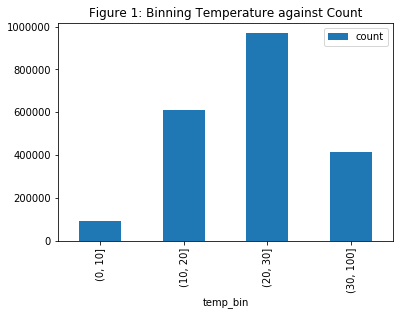

In [61]:
# Creating another DF with just temp_bin and count
# groupby merges and adds those with the same temp_bin values
# reset_index to fix the offset in column name alignment due to groupby
# A bar chart with the temp_bin against count is plotted
temp_bin_count_df = data[['temp_bin', 'count']].copy()
group_temp_bin = temp_bin_count_df.groupby('temp_bin').sum()
temp_count = group_temp_bin.reset_index()
temp_count.plot(x='temp_bin', y = 'count', kind='bar',
                title = "Figure 1: Binning Temperature against Count")

#### 2. A plot of temperature against the count of bicycle used is generated

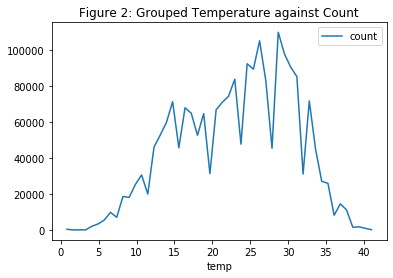

In [60]:
# quick plot of grouped temp values without binning them, sums count
sum_of_count_by_temp = data.groupby('temp').sum()
count_temp = sum_of_count_by_temp.reset_index()
count_temp.plot(x='temp', y='count',title = 'Figure 2: Grouped Temperature against Count')

#### 3. A bar chart with the datetime against count is plotted

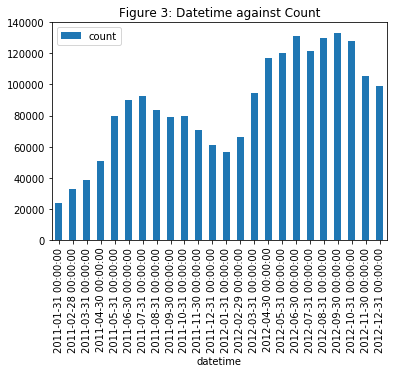

In [63]:
# Creating another DF with just datetime and count
# set_index datetime to enable resample() to work (error if dont set_index)
# resample(M) groups datetime objects according to month, sums the count values
# reset_index to fix the offset in column name alignment
data['datetime'] = pd.to_datetime(data['datetime'])
data.head()

dt_count_df = data[['datetime', 'count']].copy()
reset_dt_count_df = dt_count_df.set_index('datetime')
month_count_df = reset_dt_count_df.resample('M').sum()
month_count = month_count_df.reset_index()
month_count.plot(x='datetime', y = 'count', kind='bar', title = 'Figure 3: Datetime against Count')

#### 4. Graph for windspeed and holiday

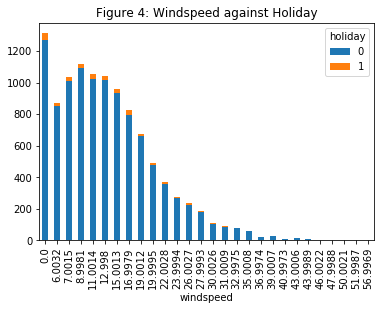

In [64]:
data.groupby(['windspeed','holiday']).size().unstack().plot(kind='bar',stacked=True, title = "Figure 4: Windspeed against Holiday")
plt.show()

#### 5. Graph for workingday and holiday

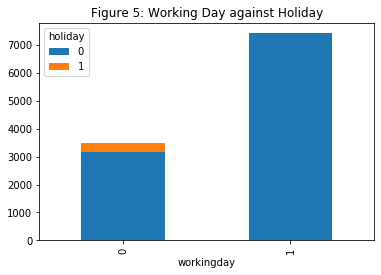

In [65]:
data.groupby(['workingday','holiday']).size().unstack().plot(kind='bar',stacked=True, title = 'Figure 5: Working Day against Holiday')
plt.show()

#### 6. Graph of windspeed and holiday after binning into four different bins

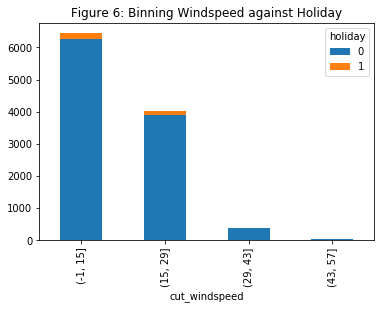

In [66]:
cut_bins = [-1, 15, 29, 43, 57]
data['cut_windspeed'] = pd.cut(data['windspeed'], bins=cut_bins)
data.groupby(['cut_windspeed','holiday']).size().unstack().plot(kind='bar',stacked=True,title = 'Figure 6: Binning Windspeed against Holiday')
plt.show()

#### 7. Graph for Weather against Count

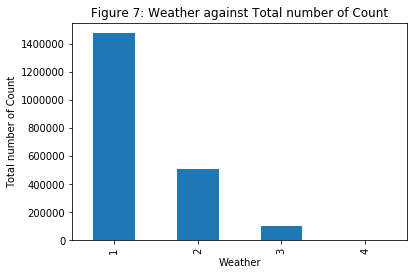

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv", index_col=False)
data.head()

data.groupby('weather')['count'].sum().plot(kind='bar')
plt.ylabel('Total number of Count')
plt.xlabel('Weather')
plt.title('Figure 7: Weather against Total number of Count')
plt.show()

#### 8. Graph for Humidity against Count

In [69]:
data['humidity'].value_counts(bins=5, sort=False)
cut_bins = [-0, 20, 40, 60, 80, 100]
data['bin_humidity'] = pd.cut(data['humidity'], bins=cut_bins)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,bin_humidity
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"(80, 100]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"(60, 80]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"(60, 80]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"(60, 80]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"(60, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"(40, 60]"
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"(40, 60]"
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"(60, 80]"
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"(60, 80]"


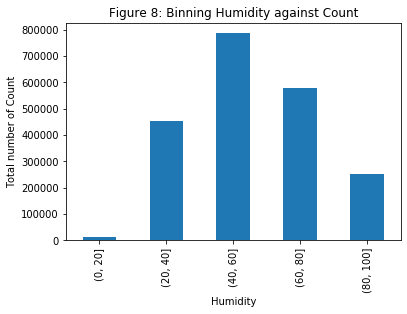

In [71]:
#graph after binning
data.groupby('bin_humidity')['count'].sum().plot(kind='bar')
plt.ylabel('Total number of Count')
plt.xlabel('Humidity')
plt.title('Figure 8: Binning Humidity against Count')
plt.show()

#### 9. Graph for Season agains Count

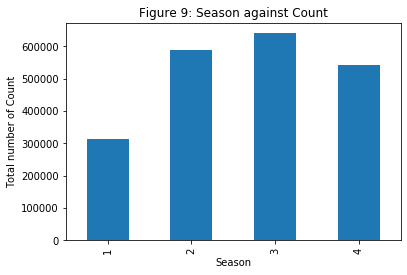

In [72]:
data.groupby('season')['count'].sum().plot(kind='bar')
plt.ylabel('Total number of Count')
plt.xlabel('Season')
plt.title('Figure 9: Season against Count')
plt.show()

### Results
In figure 1, we can see that the highest count of bicycle used was when the temperature is between 20 and 30 degree celcius. From this graph we also can see that the lowest count of bicycle used was when the temperature 0 to 10 degree celcius.

In figure 2, the count of bicycle used peaked during the temperature around 29 degree celcius and at its lowest on 0 degree celcius and 40 degree celcius.

In figure 3, the graph showed the count of bicycle used against the months between 2011 and 2012. From this graph we can see that the number of bicycle used peaked on June and July in 2011 and May and September in 2012.

In figure 4, we can see that the windspeeds impact the count of bicycle used. During the day with low windspeed, more bicycle is being used. In addition, for the days
with higher windspeed, less bicycle is being used.

This observation is being supported by figure 6 where we can see that the highest number of bicycle is
being used is when the wind speed between 1-15 while when windspeed is in between 43-57, lowest number 
of bicycle is being used.

In figure 7, the graph showed how many times a bike was rent in four different weather within the span of 2 years. The total number of Count in Y-axis is read as the total number of bike rental and the X-axis is the weather condition when the bike was rent. From the graph, we can see that Weather 1 which indicate the state of weather as clear, few clouds, partly cloudy, and partly cloudy to has the highest count of bike rental. The lowest bike rental count is on Weather 4 which indicate the state of weather as heavy rain, ice pallets, thunderstorm, mist, snow and fog.

In figure 8, the graph showed that there is high usage of bike when humidity is at range of 40 - 60. The lowest usage of bike is when humidity is at range 0 - 20.

In figure 9, the graph showed the season against count of bicycle used. From the graph, the most bike used is during the Season 3, Fall season. The lowest bicycle used is during the Season 1, Spring season. 

**These are the data field indications used in this visualisation section:**

**Count** = Number of total rental

**Weather** = 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**datetime** = hourly date + timestamp  

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total bike rentals



## Modelling

In modelling part, we use 3 different supervised machine learning modelling to create predictive model in order to predict the bike rental. The 3 machine learning models are:
    - Linear regression
    - K nearest neighbour
    - Decision tree
Accuracy and error graph have been compared for all machine learning models in order to choose the best predictive model.

### 1. Linear Regression

In [73]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [74]:
#setting the data
dataset = data2

In [75]:
#checking the shape of the data
dataset.shape

(10886, 14)

In [76]:
#split data into features and target
X = dataset[['season', 'holiday', 'workingday', "weather",'temp','atemp','humidity','windspeed']].values
y = dataset['count'].values

In [77]:
#split data into train and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
#Instantiate the model and fit the data into linear regression model
regressor = LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=False)  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#predict the test data
y_pred = regressor.predict(X_test)

In [80]:
#actual vs prediction data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,244,195.381053
1,239,150.744163
2,229,170.245707
3,467,299.834353
4,335,203.031262
5,40,237.605638
6,329,226.790819
7,2,153.474591
8,141,265.014296
9,391,212.912300


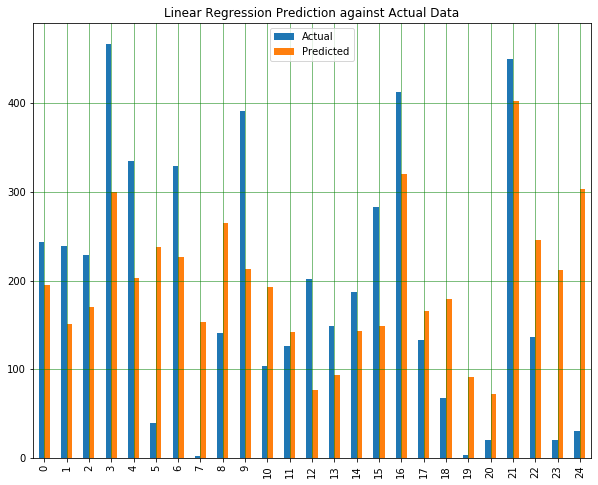

In [101]:
#plotting the prediction against actual data
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression Prediction against Actual Data")
plt.show()

In [83]:
#Error against multiple error matrix
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSERegression = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 116.4786605898335
Mean Squared Error: 23912.84110529638
Root Mean Squared Error: 154.6377738629743


### 2. K Nearest Neighbour

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [85]:
#setting the data
data3=data

In [86]:
#checking the shape of the data
data3.shape

(10886, 13)

In [87]:
#Instantiate the model

model = KNeighborsClassifier(n_neighbors=1)

In [88]:
#Splitting the data into test and train data
X = data3[['season', 'holiday', 'workingday', "weather",'temp','atemp','humidity','windspeed']].values
y = data3['count'].values

In [89]:
#splitting the data into train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=0, train_size=0.7)

In [90]:
#Fit the model
model.fit(Xtrain, ytrain)                  
ymodel = model.predict(Xtest) 

In [91]:
#Actual vs predicted data
df2 = pd.DataFrame({'Actual': ytest, 'Predicted': ymodel})
df2 = df2.head(25)
df2

,Actual,Predicted
0,244,188
1,239,681
2,229,86
3,467,492
4,335,323
5,40,102
6,329,278
7,2,134
8,141,180
9,391,498


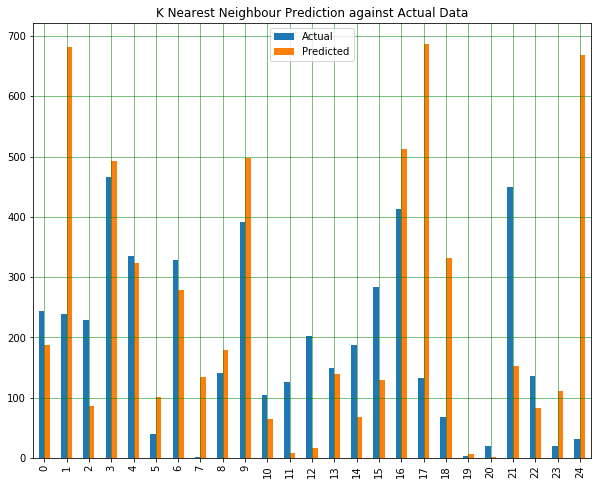

In [100]:
#plotting the prediction against actual data
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("K Nearest Neighbour Prediction against Actual Data")
plt.show()

In [92]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(ytest, ymodel))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ymodel))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ymodel))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ymodel)))
RMSEKNeighbour = np.sqrt(metrics.mean_squared_error(ytest, ymodel))

Accuracy score: 0.007042253521126761
Mean Absolute Error: 141.66380894060012
Mean Squared Error: 41028.38824249847
Root Mean Squared Error: 202.55465495144384


### 3. Decision Tree with Gini Index


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data4 = data
X1 = data4[['season', 'holiday', 'workingday', "weather",'temp','atemp','humidity','windspeed']].values
y1 = data4['count'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.7, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini")

clf_gini.fit(X_train, y_train)

dt_gini_model = clf_gini.predict(X_test)
gini_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_gini_model})
gini_results_df.head()

,Actual,Predicted
0,244,47
1,239,16
2,229,86
3,467,823
4,335,346


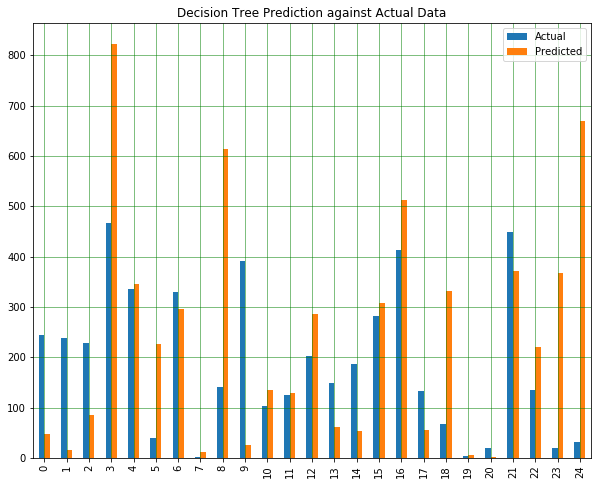

In [99]:
#plotting the prediction against actual data
gini_results_df = gini_results_df.head(25)
gini_results_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Decision Tree Prediction against Actual Data")
plt.show()

In [95]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test, dt_gini_model))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_gini_model))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_gini_model))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_gini_model)))
RMSEDecisionTree = np.sqrt(metrics.mean_squared_error(y_test, dt_gini_model))

Accuracy score: 0.00433014040152211
Mean Absolute Error: 139.7764072956305
Mean Squared Error: 40052.543760661334
Root Mean Squared Error: 200.13131629173216


### Evaluation and Analysis

### Evaluation
Compare the results between multiple machine learning models

Result to compare:
- Accuracy 
- Error
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

| Machine Learning Models | Error | Accuracy | Mean Absolute Error | Mean Squared Error | Root Mean Squared Error |
| --- | --- | --- | --- | --- | --- |
| Liner Regression | 154.637774	 | - | 116.47866 | 23912.84110 | 154.63777 |
| K-NN | 202.554655 | 0.00704 | 141.66380 | 41028.38824 | 202.55465 |
| Decision Tree | 200.131316 | 0.00433 | 139.77640 | 40052.54376 | 200.13131 |

### Comparing error between machine learning model

In [97]:
#setting error dataframe
Error = {'RMSE K Nearest Neighbour': [RMSEKNeighbour], 'RMSE Linear Regression': [RMSERegression], "RMSEDecisionTree": [RMSEDecisionTree]}
ErrorDf = pd.DataFrame(Error)
ErrorDf

,RMSE K Nearest Neighbour,RMSE Linear Regression,RMSEDecisionTree
0,202.554655,154.637774,200.131316


Text(0.5, 1.0, 'Error Comparison between Models')

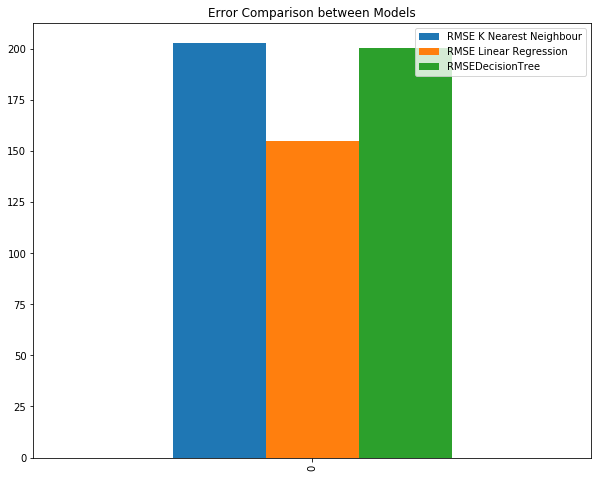

In [98]:
ErrorDf.plot(kind='bar',figsize=(10,8))
plt.title("Error Comparison between Models")

### Analysis

In analysis phase, after analyzed the results generated from visualization and modelling phase, we can now answer our initial questions with respective graph in this project and analysis provided. 

1. Is bike sharing a sustainable solution?
    - Yes. As we can refer to the box plot figure created in cleaning data part, we can see that the distribution is positively skewed. This shows that the higher counts which is the number of bike rental counts are more frequent. This indicates positive demand of bike rental which can be concluded that bike sharing is a sustainable solution for future works.

2. How does the weather affect bike sharing demands?
    - Based on result gathered in visualization phase, we can conclude that the weather do take affect in bike sharing demands. When the weather is likely to be clear, there are more demand on this weather compared to bad weather such as heavy rain and thurnderstorm weather. 

3. Which is most popular season for bike sharing? 
    - The most popular season for bike sharing is during the Fall season. We can relate this result to temperature, humidity and weather data. 

4. What is the factors that affecting bike rentals demand?
    - The factors that affecting bike rentals demand are 
        - The weather
        - The season
        - The holiday day and working day
        - Temperature for the day
        - Humidity for the day
        - Windspeed for the day

Another insight that can we gained from this analysis is on choosing the best machine learning model in predicting the success of bike rental. **The best model that can be used to predict the success of bike rental is Linear Regression model**. Compared to the other two models, linear regression has the least error for its predictive models. Other than measuring the overall error from the prediction models, we can considered to compare the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error calculation. These three error calculation also showed that linear regression has the least error compared to K nearest neighbour and decision tree models.


## Future works

In future, we could use the data and analysis about the bike sharing program to be used for bike sharing program implementation in Malaysia. Through data from Malaysia such as weather data and holiday data, we could predict the success of this bike sharing program if implemented in Malaysia. We can create some predictive system to predict the success of bike sharing with Malaysia's weather and holiday data. 